In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/insurance_data.csv')
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [4]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [5]:
df.isnull().sum().sum()

np.int64(52)

In [6]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [7]:
df.duplicated().sum()

np.int64(0)

If we have null values of numerical column we will replace it with mean or median

If we have null values of categorical column we will replace it with mode

In [8]:
col_list = list(df.columns)
print(col_list)

['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount', 'past_consultations', 'num_of_steps', 'Hospital_expenditure', 'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges']


In [9]:
for x in col_list:
  if df[x].dtypes=='object': #It means the column is categorical
    df[x].fillna(df[x].mode()[0],inplace=True)
  else:
    df[x].fillna(df[x].mean(),inplace=True)

<ipython-input-9-09ad6627d8f3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mean(),inplace=True)
<ipython-input-9-09ad6627d8f3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [10]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


## **Outliers Detection**

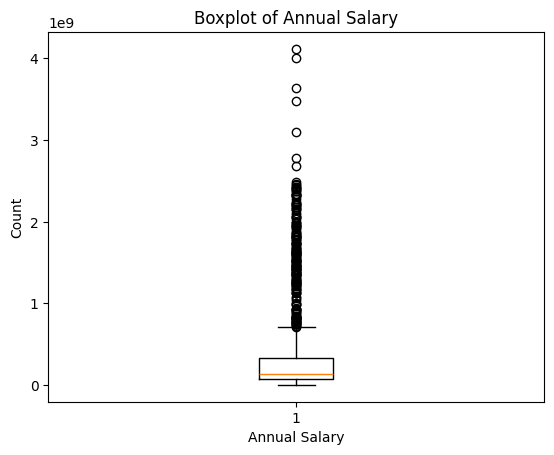

In [11]:
plt.boxplot(df['Anual_Salary'])
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.title('Boxplot of Annual Salary')
plt.show()

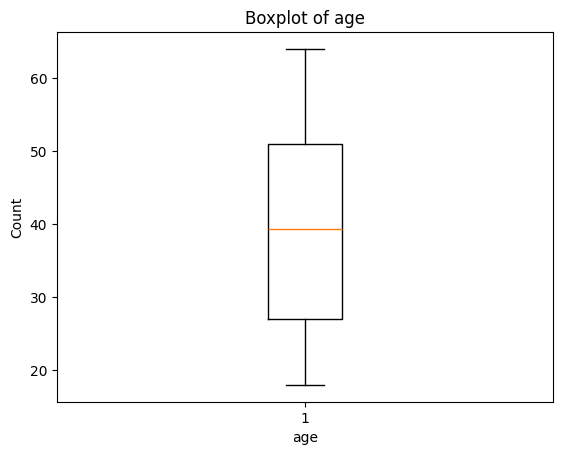

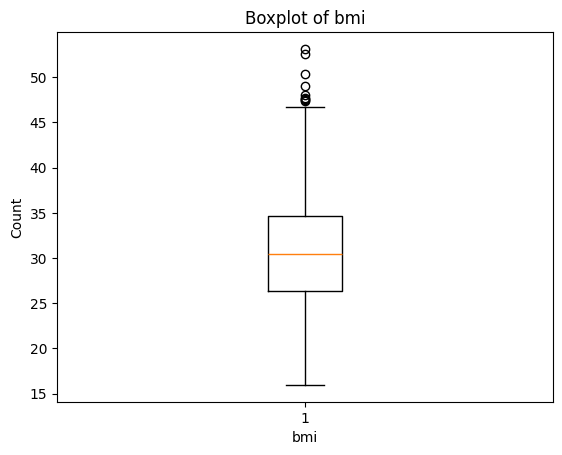

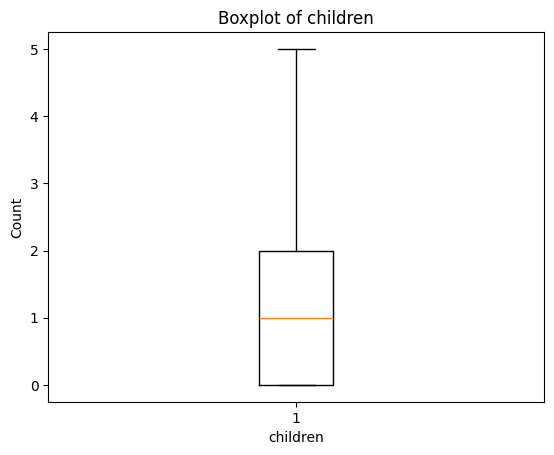

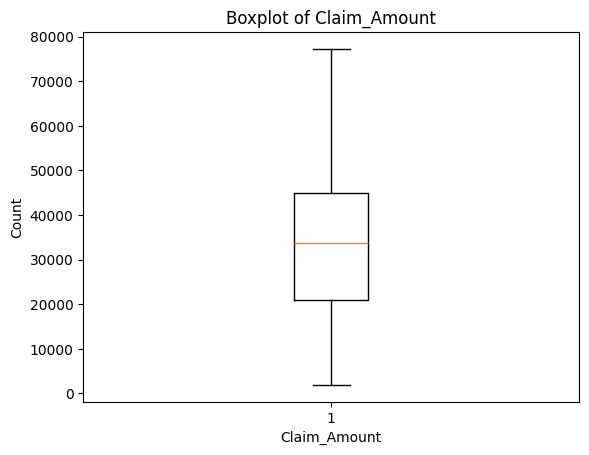

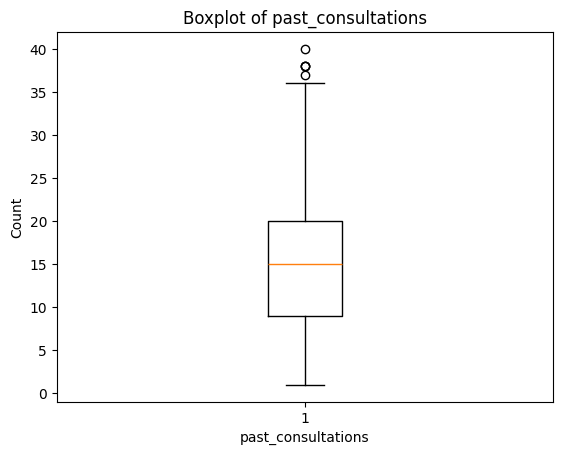

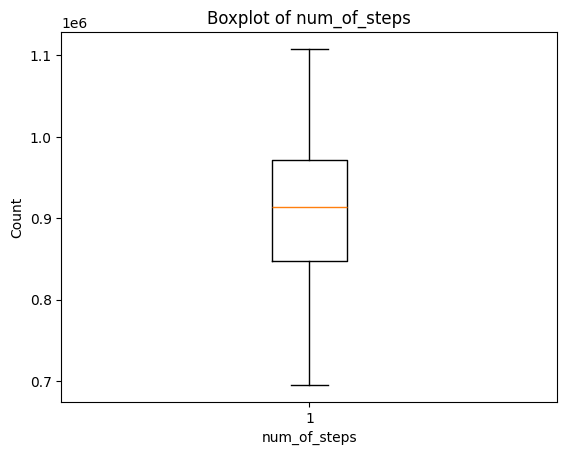

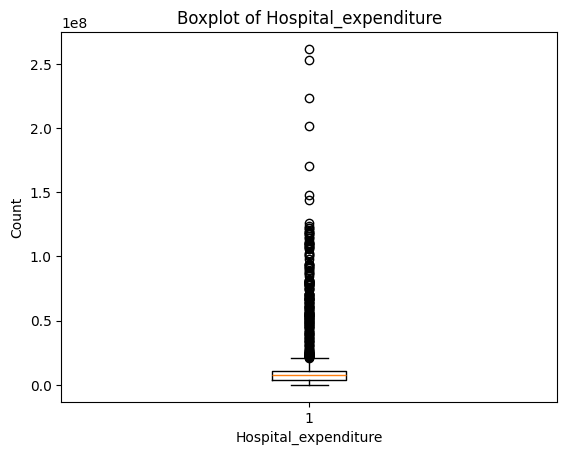

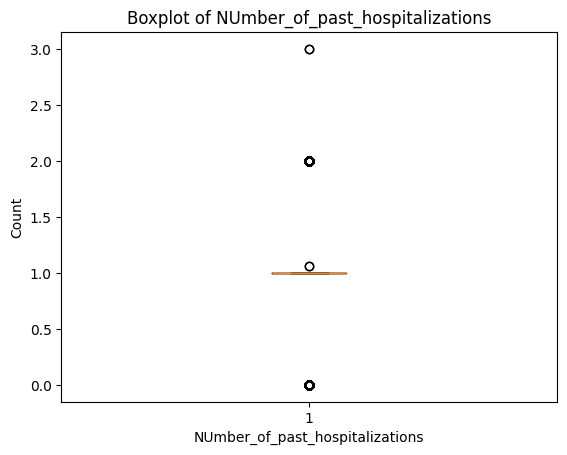

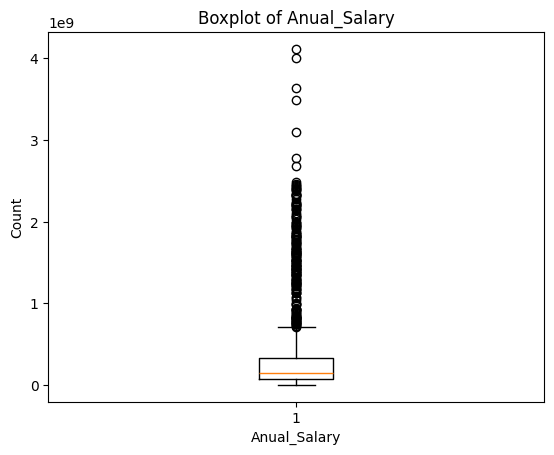

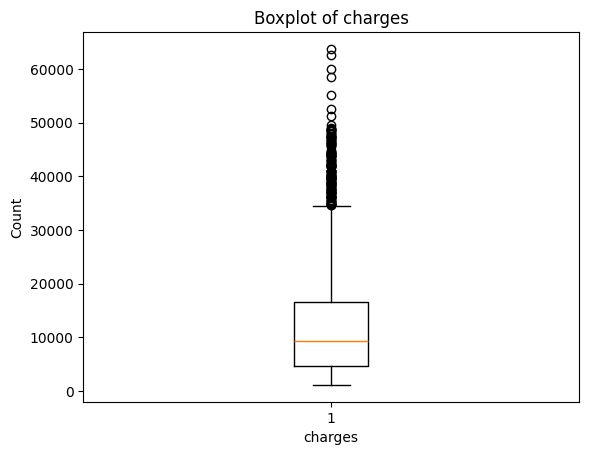

In [12]:
for x in col_list:
  if df[x].dtypes!='object':
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.title('Boxplot of '+x)
    plt.show()

In [13]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)

IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print('Lower Bound:',lower_bound)
print('Upper Bound:',upper_bound)

Lower Bound: 13.803125000000003
Upper Bound: 47.168124999999996


In [14]:
df = df[(df.bmi >= lower_bound) & (df.bmi <= upper_bound)]

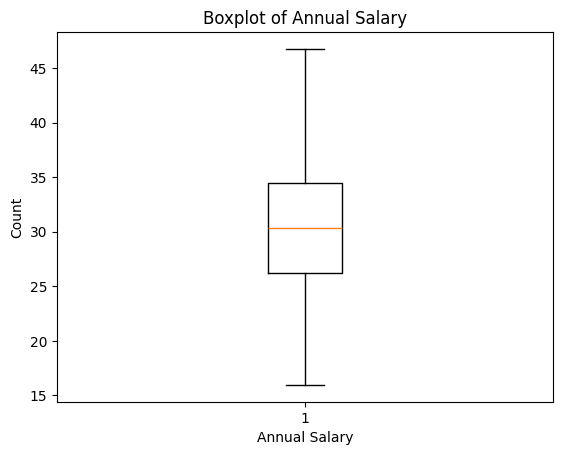

In [15]:
plt.boxplot(df['bmi'])
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.title('Boxplot of Annual Salary')
plt.show()

In [16]:
for x in col_list:
  if df[x].dtypes=='object' or x == 'charges':
    continue

  Q1 = df[x].quantile(0.25)
  Q3 = df[x].quantile(0.75)

  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  print(lower_bound, upper_bound)
  df=df[(df[x]>=lower_bound) & (df[x]<=upper_bound)]

-9.0 87.0
13.822499999999998 46.8825
-3.0 5.0
-15079.880879999993 80991.7952
-7.5 36.5
662100.125 1155245.125
-6066324.56875 20930808.357249998
1.0 1.0
-99592205.85625002 384246561.35375


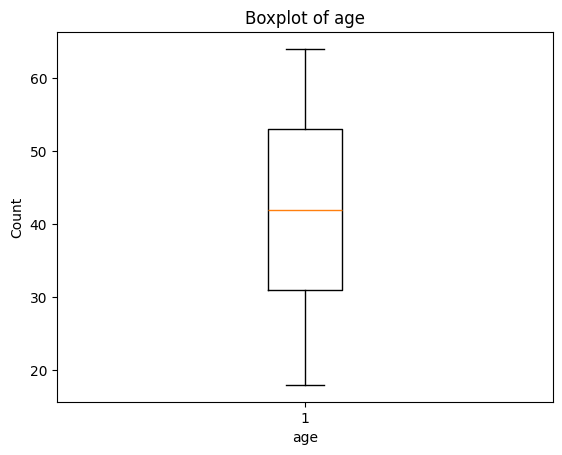

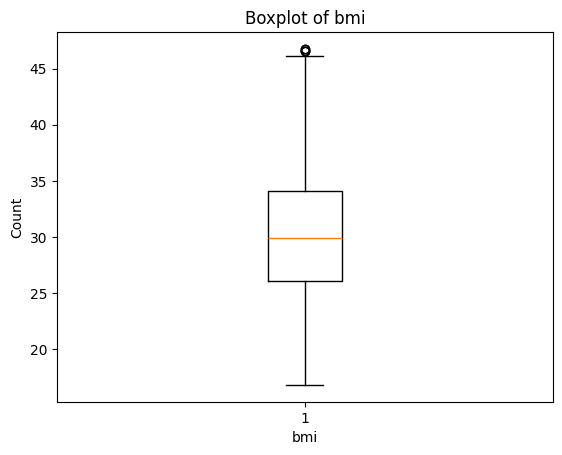

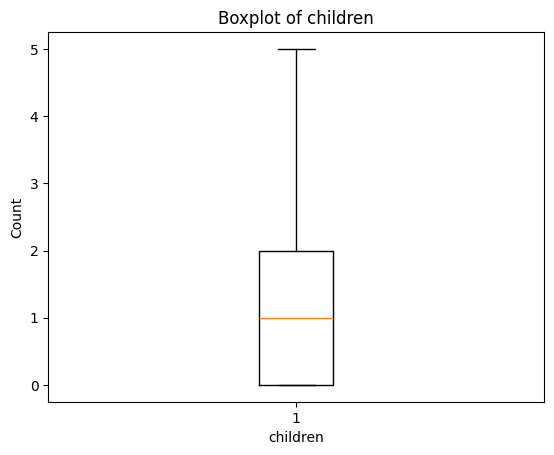

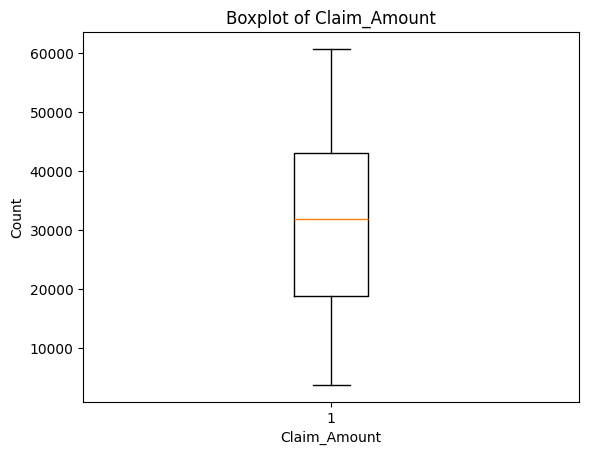

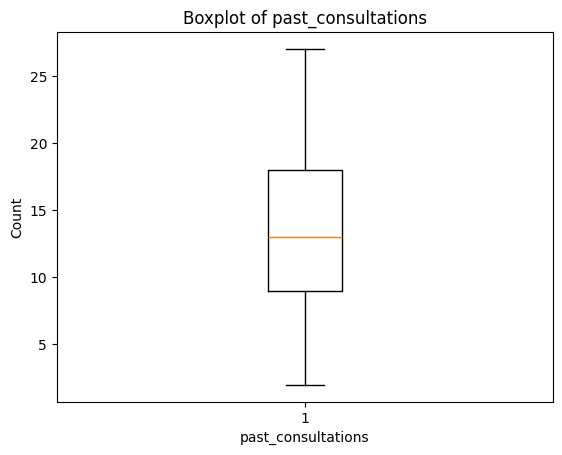

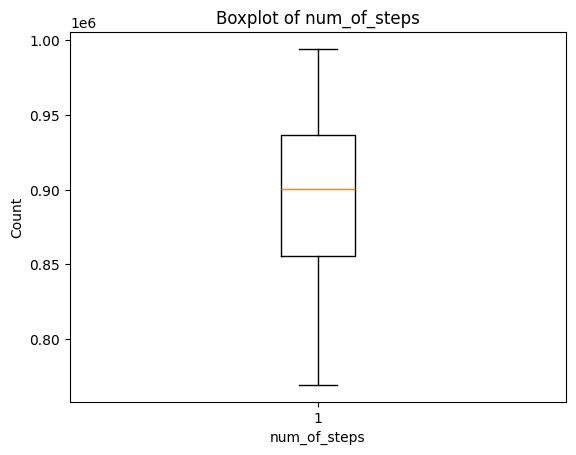

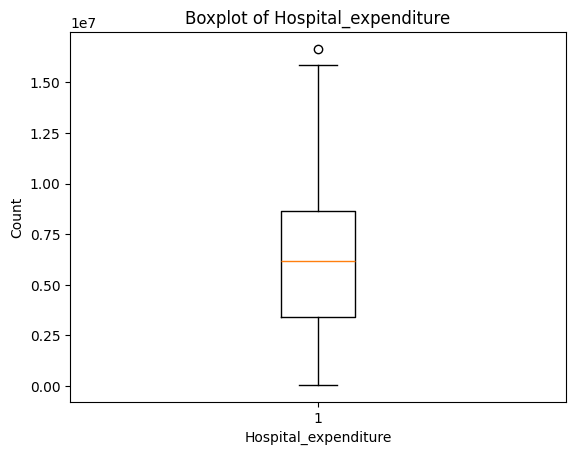

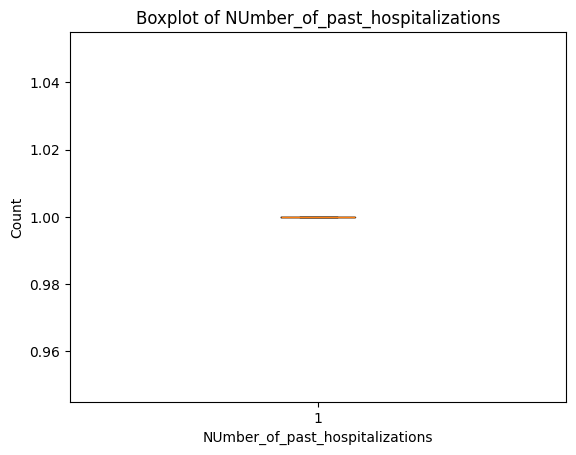

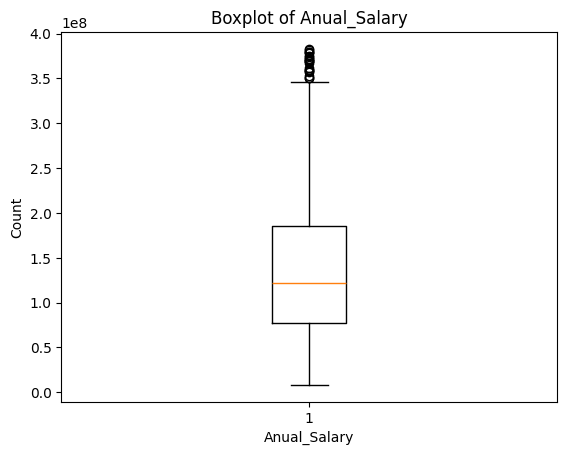

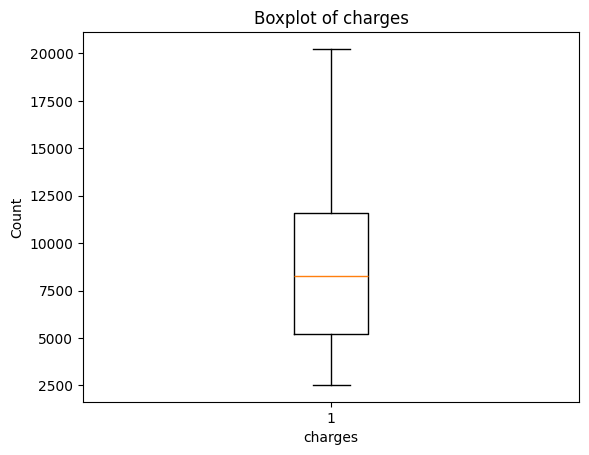

In [17]:
for x in col_list:
  if df[x].dtypes!='object':
    plt.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.title('Boxplot of '+x)
    plt.show()

In [18]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


**Label Encoding**

In [19]:
#There can be a possibility that the categorical columns are affecting our target column
#But my model does not understand categorical values
#Now i need to convert my categorical columns into numeric columns

In [20]:
#Label Encoding -> used to convert your categorical column into numerical columns
#It follows alphabetical values order

#Black -> LE -> 0
#Green -> LE -> 2
#blue -> LE -> 1
#red -> LE -> 4
#Blue -> LE -> 1
#green -> LE -> 2
#grey -> LE -> 3

In [21]:
# gender, smoker and region needs to be label encoded

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
col_list

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [25]:
for x in col_list:
  if df[x].dtypes=='object':
    df[x]=le.fit_transform(df[x])

In [26]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,2523.16950
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1,2527.81865
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,2534.39375
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2,2566.47070
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2,19350.36890
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455


## ** Model Building**

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
#x-train -> Training questions independent columns
#y-train -> training answers   dependent columns
#x-test -> testing questions of independent columns (some rows that i won't pass to the model)
#y-test -> testing answers of the dependent columns (to analyse the performance of the model)

In [29]:
X = df.iloc[:,:12]
Y = df.iloc[:,-1]

In [30]:
X

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0


In [31]:
Y

,charges
151,2523.16950
152,2527.81865
153,2534.39375
154,2566.47070
155,2585.26900
...,...
1046,19107.77960
1048,19199.94400
1050,19350.36890
1062,19798.05455


In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.75)

In [33]:
x_train #training data (questions)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
1062,43.0,0,20.045,2.0,1,21596.438460,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0
525,41.0,1,34.200,2.0,0,34659.981860,12.0,882552.0,1.685158e+06,1.0,8.404624e+07,1
429,33.0,1,29.400,4.0,0,47713.396980,4.0,876356.0,1.019150e+06,1.0,8.304025e+07,3
582,40.0,1,30.875,4.0,0,8083.681554,4.0,917161.0,2.330715e+06,1.0,1.005477e+08,1
592,48.0,0,33.330,0.0,0,53199.040750,9.0,903769.0,6.993832e+06,1.0,8.386858e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
680,50.0,0,46.090,1.0,0,12644.534700,15.0,905659.0,6.445965e+06,1.0,1.294475e+08,2
793,33.0,1,42.460,1.0,0,36343.864730,11.0,933484.0,8.089966e+06,1.0,2.023595e+08,2
854,60.0,1,25.740,0.0,0,10462.197210,15.0,954922.0,8.333001e+06,1.0,2.155723e+08,2
849,54.0,0,23.000,3.0,0,50873.171900,15.0,948798.0,3.530484e+06,1.0,1.799271e+08,3


In [34]:
y_train #traing data (answers)

,charges
1062,19798.05455
525,7261.74100
429,6059.17300
582,8162.71625
592,8283.68070
...,...
680,9549.56510
793,11326.71487
854,12142.57860
849,12094.47800


In [35]:
x_test #testing data, after building i'll test using this data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
722,49.0,0,23.180,2.0,0,54928.93827,11.0,922967.0,1.949113e+06,1.0,1.721027e+08,1
881,57.0,0,25.740,2.0,0,29665.91751,22.0,933987.0,2.673580e+06,1.0,2.354762e+08,2
215,26.0,1,33.915,1.0,0,23256.12576,16.0,819426.0,2.881179e+06,1.0,1.078410e+08,1
589,48.0,0,22.800,0.0,0,17700.01818,6.0,905879.0,7.244261e+06,1.0,1.508728e+08,3
974,24.0,0,20.520,0.0,1,33643.94780,6.0,952654.0,3.693183e+06,1.0,2.349833e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,38.0,0,40.150,0.0,0,14103.38971,11.0,854440.0,6.776002e+06,1.0,8.097663e+07,2
293,31.0,0,31.065,0.0,0,33700.72964,21.0,823357.0,8.648751e+06,1.0,2.603093e+07,0
378,33.0,1,27.455,2.0,0,46073.65436,5.0,849530.0,2.606962e+06,1.0,4.707590e+07,1
706,51.0,0,37.730,1.0,0,43486.34158,13.0,909942.0,1.080441e+07,1.0,1.623253e+08,2


In [36]:
linear_model = LinearRegression()

In [37]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [39]:
# Now we need to test the data to check what values my model will predict

model_predicted=linear_model.predict(x_test)

In [40]:
model_predicted

array([10552.16195393, 12155.05170215,  4017.9336313 ,  9432.4703958 ,
       14416.97641609, 12146.85685221,  2700.77005749, 17281.94438651,
        9495.80173131,  6426.63613519,  4808.36494493,  8912.34542995,
        3563.41645169,  6393.54974741,  4980.05418673,  8396.87991628,
        1922.29792238, 14748.53958389, 10529.33271413, 10588.59638581,
        8373.52724441,  2659.3638587 ,  3742.27391815, 17390.06662559,
        8880.18849711, 11983.8081001 , 11305.23640202,  3965.71998365,
        6267.35419843,  5777.96851286,  9882.01081337,  7953.23253682,
       16650.89125492, 11155.65696958, 11421.98706855,  5456.55669183,
        6208.39091891,  7202.9481751 , 12349.00116589,  8061.37741231,
       14161.96911659,  8680.63903761, 10479.28489271, 10250.73164579,
        5637.66408779,  7952.08289706,  8867.88762446,  8244.40713805,
        2957.06637478,  8786.72837595,  4027.24258821,  2718.08593184,
        5776.3340023 ,  5183.98667944, 10758.3300447 ,  5387.6049374 ,
      

In [41]:
y_test

,charges
722,10156.78320
881,12629.16560
215,3292.52985
589,8269.04400
974,14571.89080
...,...
392,5400.98050
293,4347.02335
378,5261.46945
706,9877.60770


In [ ]:
#Evaluation
#MSE
#RMSE
#r2_score

In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
mse = mean_squared_error(y_test, model_predicted)

In [44]:
mse

578629.843801978

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_accuracy = r2_score(y_test, model_predicted)
r2_accuracy*100

96.42775289993747

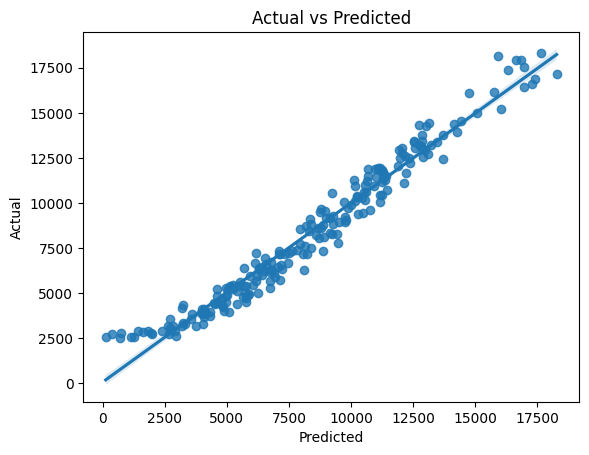

In [50]:
sns.regplot(x=model_predicted, y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
#When we have to check the error rate of model we use mse (mean squared error)
# Rmse -> sqrt of mse